# Problem Set 2
# Haoyuan Li
# 1. Radiogenic heat budget in Earth over time
# Part A: Plot data from book

For U238, Total heat now is 1.2217e+01 TW, Total heat 4.5 Gyr ago is 2.4556e+01 TW
For U235, Total heat now is 5.2828e-01 TW, Total heat 4.5 Gyr ago is 4.4367e+01 TW
For Th232, Total heat now is 1.2741e+01 TW, Total heat 4.5 Gyr ago is 1.5921e+01 TW
For K40, Total heat now is 2.7198e+00 TW, Total heat 4.5 Gyr ago is 3.3112e+01 TW


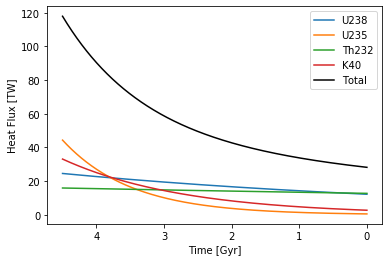

In [1]:
import numpy as np
from matplotlib import pyplot as plt


class HPE():
    '''
    class for heat-producing elements
    Attributes:
        contents: value of contents of isotopes, ndarray, unit: kg
        ref_time: reference time, corresponding to the time that isotopes have input contents
        energies: heat rate of isotopes, ndarray, unit: W/kg
        half_life: half life of isotopes, ndarray, unit: s
        total: total number of isotopes, int
        name: names of isotopes, char
    '''
    def __init__(self, _contents, _energies, _half_life, **kwargs):
        '''
        Key, value in Kwargs:
            'time': a past time related to _content, float, unit: s
        '''
        self.contents = _contents.copy()
        self.energies = _energies.copy()
        self.half_life = _half_life.copy()
        _ref_time = kwargs.get('time', np.zeros(_contents.size))
        if type(_ref_time) is float:
            self.ref_time = np.ones(_contents.size) * _ref_time
        else:
            self.ref_time = _ref_time.copy()
        self.total = self.contents.size
        self.name = kwargs.get('name', ['U238', 'U235', 'Th232', 'K40'])
        pass
    
    def Heating(self, _time_from_now):
        '''
        Compute HPE heating
        Inputs:
            _time_from_now: a past time, double or ndarray, unit: s
        Returns:
            _heating: heat rate, ndarray, W/s
            _contents: Isotope contents, ndarray, kg
        '''
        if (type(_time_from_now) is float) or (type(_time_from_now) is int):
            # deal with a single number
            _contents = self.contents * np.exp(np.log(2.0) * (_time_from_now - self.ref_time) / self.half_life)  # contents at a pass time
            _heatings = _contents * self.energies
        elif type(_time_from_now) is np.ndarray:
            # deal with a ndarray
            _exponent = np.log(2.0) * (np.outer(_time_from_now, 1.0 / self.half_life) - np.outer(np.ones(_time_from_now.size), self.ref_time / self.half_life))
            _contents = np.exp(_exponent) * self.contents
            _heatings = _contents * self.energies
        return _heatings, _contents
    
    
Myr = 1e6 * 24 * 3600 * 365
Gyr = 1e9 * 24 * 3600 * 365
_contents = np.array([12.86e16, 0.094e16, 47.9e16, 1.1668e-4 * 7.77e20 ])
_energies = np.array([95.0e-6, 562.0e-6, 26.6e-6, 30.0e-6])
_half_life = np.array([4468.0, 704.0, 14000.0, 1248.0]) * Myr
Hpe = HPE(_contents, _energies, _half_life)

# compute value of heat flux
_t0 = 4.5 * Gyr  # Time to start, s
_Np = 1000
_t = np.linspace(_t0, 0.0, _Np) 
_heatings_by_time, _contents_by_time = Hpe.Heating(_t)

# Screen Output
_heatings_now, _contents_now = Hpe.Heating(0.0)
_heatings_past, contents_past = Hpe.Heating(4.5 * Gyr)
for i in range(Hpe.total):
    print('For %s, Total heat now is %.4e TW, Total heat 4.5 Gyr ago is %.4e TW' %
         (Hpe.name[i], _heatings_now[i]/1e12, _heatings_past[i]/1e12))
    
# plot results
fig, ax = plt.subplots()
for i in range(Hpe.total):
    # loop for every isostope
    ax.plot(_t/Gyr, _heatings_by_time[:, i]/1e12, label = Hpe.name[i])
ax.plot(_t/Gyr, _heatings_by_time.sum(axis=1)/1e12, 'k', label = 'Total')
ax.invert_xaxis()
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel("Heat Flux [TW]")
ax.legend()
fig.show()

## Part B: Plot data from Arevalo et al., 2009

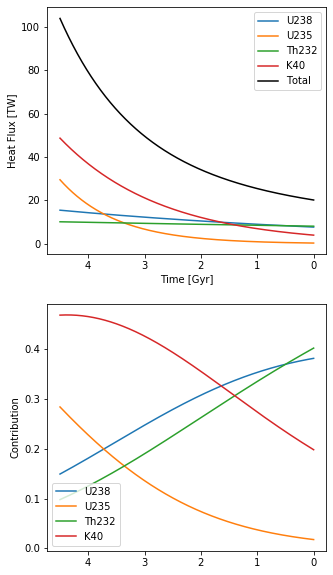

In [2]:
# Plot results from Arevalo et al(2009)
# Values of isotope contents are given in fraction
_mass_of_earth = 5.9742e24  # unit: kg
_contents = np.array([2.72979e-08, 8.78735e-09, 6.38824e-08, 2.71627E-07]) * _mass_of_earth
Hpe_arevalo = HPE(_contents, _energies, _half_life, time = _t0)
_heatings_by_time, _contents_by_time = Hpe_arevalo.Heating(_t)
_total_heating_by_time = _heatings_by_time.sum(axis=1)
_contribution_by_time = (_heatings_by_time.transpose() / _total_heating_by_time).transpose()  # contribution of isotopes over time
# plot results
# 0: Absolute radiogenic heat flux
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
for i in range(Hpe.total):
    # loop for every isostope
    axs[0].plot(_t/Gyr, _heatings_by_time[:, i]/1e12, label = Hpe.name[i])
axs[0].plot(_t/Gyr, _total_heating_by_time/1e12, 'k', label = 'Total')
axs[0].invert_xaxis()
axs[0].set_xlabel("Time [Gyr]")
axs[0].set_ylabel("Heat Flux [TW]")
axs[0].legend()
# 1: Relative Contribution
for i in range(Hpe.total):
    # loop for every isostope
    axs[1].plot(_t/Gyr, _contribution_by_time[:, i], label = Hpe.name[i])
axs[1].invert_xaxis()
axs[1].set_ylabel("Contribution")
axs[1].legend()
fig.show()

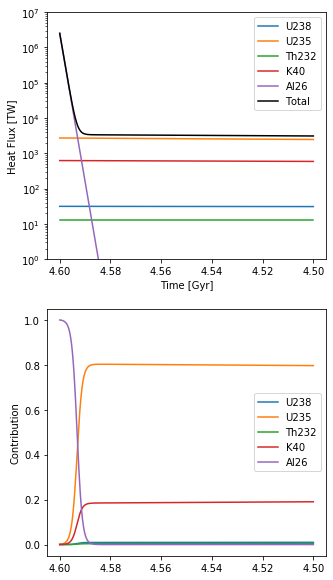

In [12]:
# Get the HPE of Al26 at time zero of the solar system
_content_al26 = 0.0235 * 5e-5 * _mass_of_earth
_energy_al26 = 0.3583
_half_life_al26 = 0.717 * Myr
_contents = np.array([2.72979e-08, 8.78735e-09, 6.38824e-08, 2.71627E-07]) * _mass_of_earth
_contents = np.append(_contents, _content_al26)
_energies = np.array([95.0e-6, 562.0e-6, 26.6e-6, 30.0e-6])
_energies = np.append(_energies, _energy_al26)
_half_life = np.array([4468.0, 704.0, 14000.0, 1248.0]) * Myr
_half_life = np.append(_half_life, _half_life_al26)
_time = np.array([0.0, 0.0, 0.0, 0.0, 4.6*Gyr])
_name = ['U238', 'U235', 'Th232', 'K40', 'Al26']
Hpe_arevalo_with_Al26 = HPE(_contents, _energies, _half_life, time=_time, name=_name)
_t = np.linspace(4.6, 4.5, 1000) * Gyr  # look for the first 0.1 Gyr
_heatings_by_time, _contents_by_time = Hpe_arevalo_with_Al26.Heating(_t)
_total_heating_by_time = _heatings_by_time.sum(axis=1)
_contribution_by_time = (_heatings_by_time.transpose() / _total_heating_by_time).transpose()  # contribution of isotopes over time
# plot results
# 0: Absolute radiogenic heat flux
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
for i in range(Hpe_arevalo_with_Al26.total):
    # loop for every isostope
    axs[0].semilogy(_t/Gyr, _heatings_by_time[:, i]/1e12, label = Hpe_arevalo_with_Al26.name[i])
axs[0].plot(_t/Gyr, _total_heating_by_time/1e12, 'k', label = 'Total')
axs[0].set_ylim([1, 1e7])
axs[0].invert_xaxis()
axs[0].set_xlabel("Time [Gyr]")
axs[0].set_ylabel("Heat Flux [TW]")
axs[0].legend()
# 1: Relative Contribution
for i in range(Hpe_arevalo_with_Al26.total):
    # loop for every isostope
    axs[1].plot(_t/Gyr, _contribution_by_time[:, i], label = Hpe_arevalo_with_Al26.name[i])
axs[1].invert_xaxis()
axs[1].set_ylabel("Contribution")
axs[1].legend()
fig.show()

## Part C

### Explain why the Earth’s crust has such a large concentration of radioactive elements

Earth's crust is formed by differentialtion of the mantle. When partial melt of the mantle happens, the refractory elements are enriched in the melt. As radioactive elements are refractory, they are enriched in the crust eventually. Moreover, as the crust is being recycled and reproduced, this enriched signature is being updated all the time.

### Why does the K/U ratio for Earth have about the same value in all rocks even though the concentrations of these elements vary by orders of magnitude

I think this is because that in terms of trace element compatibility, K and U are near each other and they have similar value of partition coefficients. Thus they only fractionate to each other to a small degree, while they could both fractionate to other trace elements to a much larger degree and leads to variations of orders of magnitude in different rock types.


# 2. Lord Kelvin and the cooling Earth

## Part A: problem 21.3

In [4]:
# Part A: problem 21.3
_Classical_E_thermal = 24943.0  # Unit: J(atom gram)^-1 Kg^-1 K^-1
_m_atom_mantle = 21.1  # atom weight
_m_atom_core = 44.8
_Mass_mantle = 4e24  # unit: W
_Mass_core = 2e24
_surface_heat_flux = 44.2e12  # unit: W

_Cp = _Classical_E_thermal / _m_atom_mantle * _Mass_mantle +\
    _Classical_E_thermal / _m_atom_core * _Mass_core
_dT = _surface_heat_flux * 4.5 * Gyr / _Cp

# Screen output
print('Total classical heat capacity of the Earth is %.4e J/K' % (_Cp))
print('Average cooling is %.4e K' % (_dT))

Total classical heat capacity of the Earth is 5.8421e+27 J/K
Average cooling is 1.0737e+03 K


Total classical heat capacity of the Earth is $5.8421 \times 10^{27} J/K$

Average cooling is $1073.7 K$

The temperature difference between present-day mantle temperature profile and the lower mantle solidus is smaller than this value
in the upper lower mantle and lowerest mantle. Thus, if this is the case, then those parts of the mantle would be melten at 4.5 Ga

## What is a solidus and liquidus (just to confirm everyone knows the formal definition of these terms)? 

A solidus is curve on a phase diagram below which the material is all solid, while a liquidus is a curve above which the material is all liquid.

## Is the temperature change over 4.5 Gyr plausible?

This is not plausible. On one hand, we will have to melt a lot portion of crust in geological time and have a much smaller timescale to accumulates sediments, thus conflict sedimentary record. On the other hand, portion of earth lower mantle would be melted and hind heat loss from the core. This would only allow a dynamo at much later time compared to paleomagnetism records.

## Why was Lord Kelvin wrong?

Because he didn't take into the internal heat. If we take internal heat into consideration and simply balance the surface heat loss by:

net cooling + internal heat generation = surface heat loss

then the required value for net cooling would be much smaller and only leads to a average change in the mantle by hundreds of degrees.


# Part B: Estimate how much the core has cooled since the inner core formed

In [13]:
# Part B

def Iron_solidus_inner_core(_P, _Ptp, _Ttp):
    '''
    Compute solidus temperature by given pressure
    based on equation 3 in Anzellini et al., 2013
    Inputs:
        _P: pressure, unit: GPa
        _Ptp; pressure at triple point of gamma-epsilon-liquid
            unit: GPa
        _Ttp: temperature at triple point of gamma-epsilon-liquid
            unit: K
    '''
    _left = (_P - _Ptp) / 161.2  # left side of equation 3
    _Tm = _Ttp * (_left + 1.0)**(1.0 / 1.72)
    return _Tm

_Ptp = 98.5  # pressure at triple point of gamma-epsilon-liquid, unit: GPa
_Ttp = 3712.0  # temperature at triple point of gamma-epsilon-liquid, unit: K
_T360 = Iron_solidus_inner_core(360, _Ptp, _Ttp)
_T330 = Iron_solidus_inner_core(330, _Ptp, _Ttp)
_dT_cmb = 0.787 * (_T360 - _T330)  # temperature drop at cmb, by equation 21.18 in book
# screen output
print('Temperature at inner core boundary is %.4e K at 360Gpa' % _T360)
print('Temperature at inner core boundary is %.4e K at 330Gpa' % _T330)
print('Temperature drop at inner core boundary is %.4e K' % (_T360 - _T330))
print('Temperature drop at core mantle boundary is %.4e K' % _dT_cmb)

Temperature at inner core boundary is 6.5016e+03 K at 360Gpa
Temperature at inner core boundary is 6.2292e+03 K at 330Gpa
Temperature drop at inner core boundary is 2.7240e+02 K
Temperature drop at core mantle boundary is 2.1438e+02 K


Growing from 360Gpa(0km) to 330Gpa(1200.0km), The temperature drop at inner core boundary is $272.4K$ and The temperature drop at core mantle boundary is $214.4K$. 
This indicates the cooling of mantle ~200 K during inner core Histroy.
As presented in class, different models yield different value of inner core age of 2.5Ga - 0.4Ga.
This leads to a cooling rate of 80K/Ga - 500K/Ga. 
Values larger than 250K/Ga could hardly be valid since this will lead to the seem confliction induced by Lord Kelvin's calculation.
By that, it could be argued that inner core age older than ~80Ga is more possible. And based on the knowledge of radioactivity, older values are more prefered.